In [2]:
import itertools
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans as K

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.linear_model import Ridge
from sklearn.neighbors import NearestNeighbors
import seaborn as sns


standardScaler = StandardScaler()
MMS = MinMaxScaler()

In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")


Mounted at /content/drive/


In [ ]:
x_file_path = "/content/drive/My Drive/Colab_Notebooks/HW5Data/X.csv"
X = np.loadtxt(x_file_path, delimiter=",")
y_file_path = "/content/drive/My Drive/Colab_Notebooks/HW5Data/y.csv"
Y = np.loadtxt(y_file_path, delimiter=",")
images_file_path = "/content/drive/My Drive/Colab_Notebooks/HW5Data/images.csv"
images = np.loadtxt(images_file_path, delimiter=",")

<ipython-input-6-f155238bc6af>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=Y, cmap=plt.cm.get_cmap('nipy_spectral', 10))
<ipython-input-6-f155238bc6af>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=Y, cmap=plt.cm.get_cmap('nipy_spectral', 10))


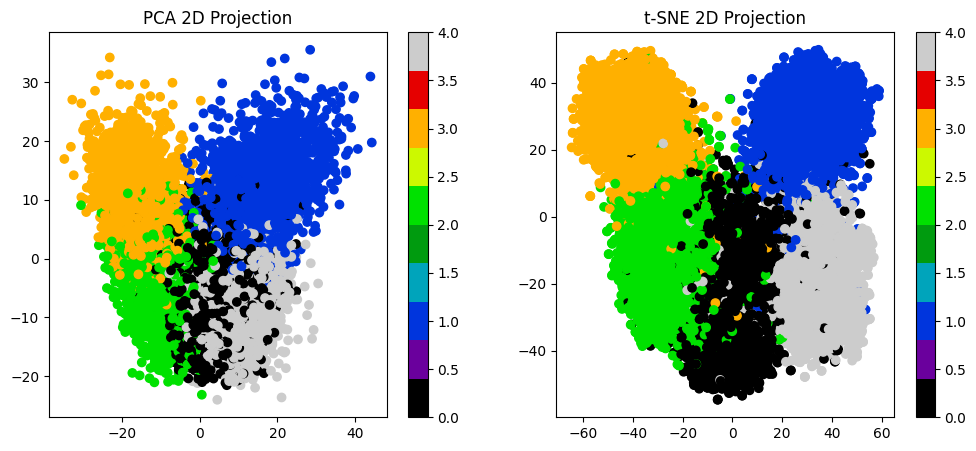

In [ ]:
pca_2d = PCA(n_components=2)
data_pca_2d = pca_2d.fit_transform(X)

tsne = TSNE(n_components=2, random_state=20)
data_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=Y, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.title('PCA 2D Projection')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=Y, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.title('t-SNE 2D Projection')
plt.colorbar()
plt.show()



In [3]:
inertia = []
silhouette = []
SSE_dif = []

for n_clusters in range(2, 21):
    kmeans = K(n_clusters=n_clusters, random_state=0,n_init=10, init='k-means++', max_iter=300)
    km = kmeans.fit(X)

    inertia.append(km.inertia_)



NameError: ignored

### **Finding the best cluster parameter **




In [ ]:

# Plotting SSE vs Number of Clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), inertia, marker='^', color='green' )
plt.title('SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.xticks(range(2, 21))
plt.grid(True)
plt.show()
print(SSE_dif)

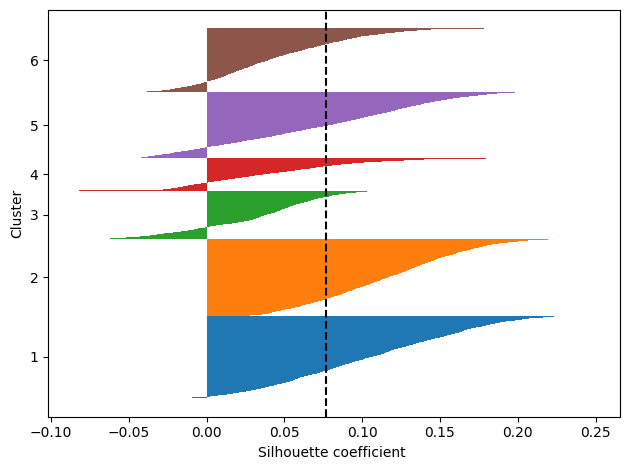

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm
km = K(n_clusters=6, random_state=80, max_iter=1000, n_init=10)
y_km = km.fit_predict(X)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,  y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none')
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="black", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient ')
plt.tight_layout()
plt.show()



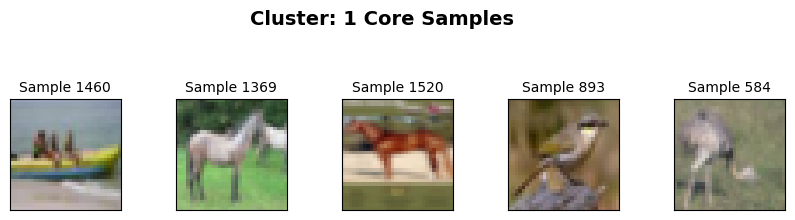

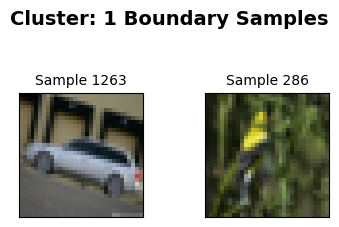

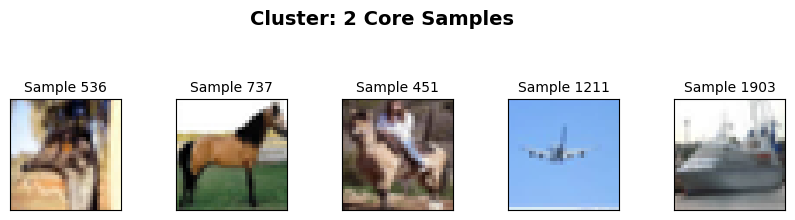

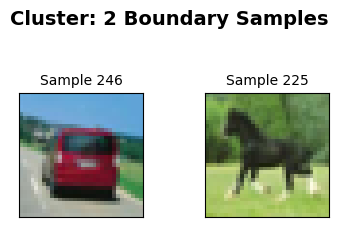

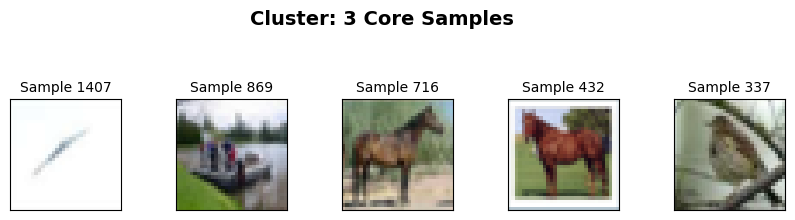

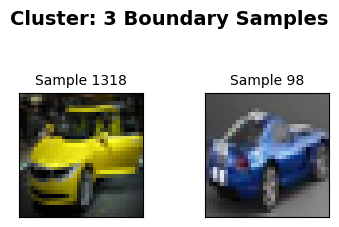

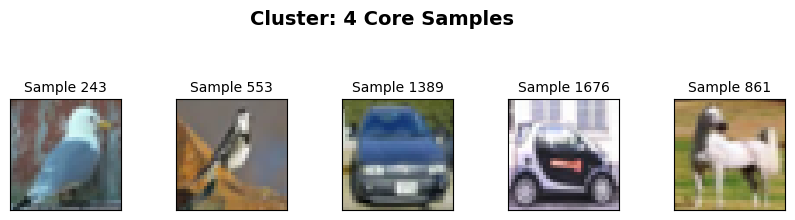

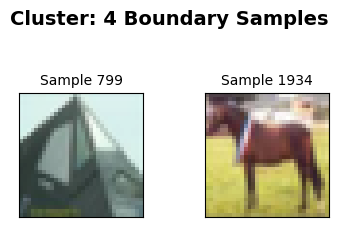

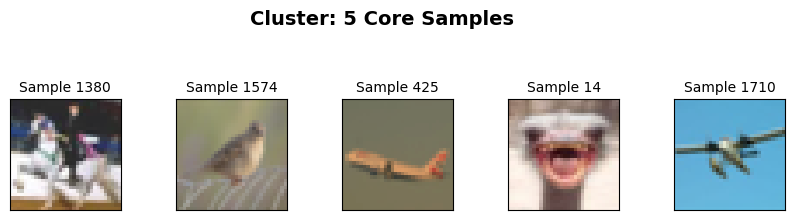

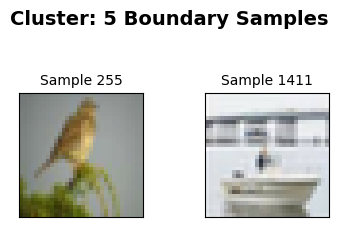

In [ ]:
km = K(n_clusters=5, random_state=0, max_iter=1000, n_init=10)
y_km = km.fit_predict(X)
silhouette_values = silhouette_samples(X, y_km, metric='euclidean')

core_samples = {}
boundary_samples = []

for i in range(n_clusters):
    cluster_silhouette_values = silhouette_values[y_km == i]
    sorted_indices = np.argsort(cluster_silhouette_values)
    core_samples[i] = sorted_indices[-5:]
    boundary_samples.append(sorted_indices[:2])

def display_images(indices, title):
    num_images = len(indices)
    plt.figure(figsize=(2 * num_images, 3))  # Adjust figure size

    for i, index in enumerate(indices):
        ax = plt.subplot(1, num_images, i + 1)
        ax.imshow(images[index].reshape(32, 32, 3), interpolation='none')
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        ax.set_title(f"Sample {index}", fontsize=10)  # Add a title to each subplot

    plt.suptitle(title, fontsize=14, fontweight='bold')
    plt.subplots_adjust(wspace=0.5)  # Adjust horizontal spacing between images
    plt.show()


for i in range(n_clusters):
    display_images(core_samples[i], f'Cluster: {i+1} Core Samples ')
    display_images(boundary_samples[i], f'Cluster: {i+1} Boundary Samples' )


In [ ]:
from sklearn.metrics import adjusted_rand_score
y_array = Y.flatten()
y_km_array=y_km.tolist()
ari = adjusted_rand_score(y_array, y_km)
print(f"The adjusted rand index is {ari}")

The adjusted rand index is 0.7700867992874822
